In [ ]:
import torch
from cifar10 import cifar10
from matplotlib import pyplot as plt
import random

dataset = cifar10("train")

In [ ]:
rand_idx = random.sample(range(len(dataset)), k=16)
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]
plt.figure(figsize=(10, 10))

for i, idx in enumerate(rand_idx):
    img, label = dataset[idx]["img"], dataset[idx]["label"]

    # the image tensor's range is not between 0 and 1,so we have to temporarily scale the tensor values into range 0 and 1 to prevent error.
    img = (img - img.min()) / (img.max() - img.min())

    img_class = class_names[label]

    plt.subplot(4, 4, i + 1)
    plt.imshow(img.permute(1, 2, 0))
    plt.title(f"Class : {img_class}", fontsize=10)
    plt.axis(False)

In [ ]:
from torch.utils.data import random_split
from torch import nn
from cifar10 import cifar10
from resnet_config import ResNetCIFAR10TrainConfig

all_train_data = cifar10("train")
train_size = int(0.9 * len(all_train_data))
val_size = len(all_train_data) - train_size
test_set = cifar10("test")
test_set = random_split(test_set, [len(test_set)])[
    0
]  # TODO: Figure out how not to do this
train_set, val_set = random_split(all_train_data, [train_size, val_size])

config = ResNetCIFAR10TrainConfig()
criterion = nn.CrossEntropyLoss(reduction="sum")

In [ ]:
from train import Trainer

trainer = Trainer(config, train_set, val_set, test_set, criterion)
trainer.train()

In [ ]:
from eval import Eval
from cifar10 import cifar10
from resnet_config import ResNetTestConfig, ResNetCIFAR10Config

evaluator = Eval(
    test_set=cifar10("test"),
    eval_config=ResNetTestConfig(),
    model_config=ResNetCIFAR10Config,
)
evaluator.evaluate()

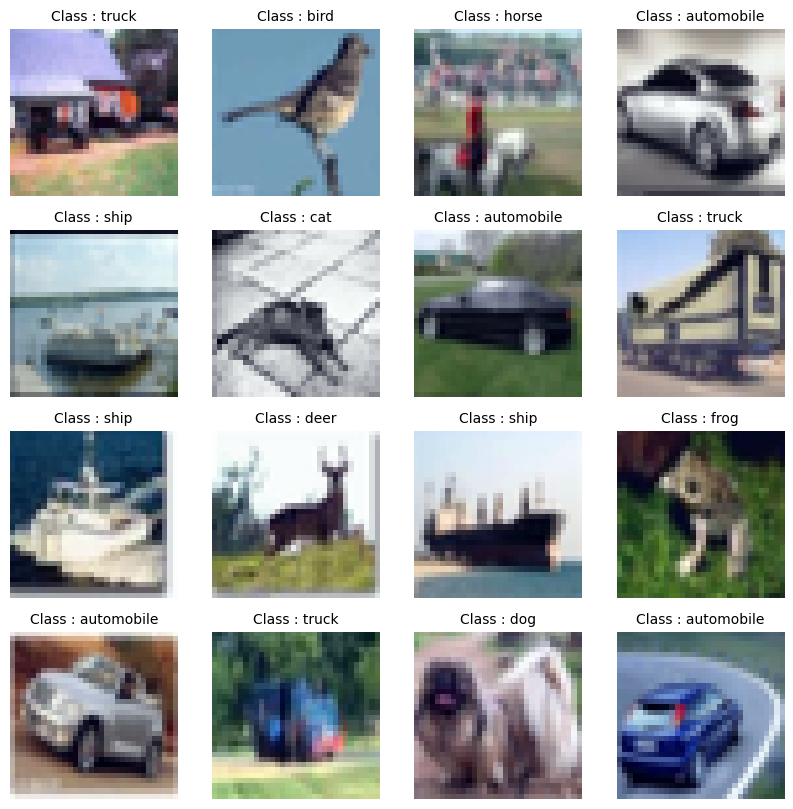

In [2]:
from cifar10 import cifar10
from matplotlib import pyplot as plt
import random

dataset = cifar10("train")
rand_idx = random.sample(range(len(dataset)), k=16)
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]
plt.figure(figsize=(10, 10))

for i, idx in enumerate(rand_idx):
    img, label = dataset[idx]["img"], dataset[idx]["label"]
    # the image tensor's range is not between 0 and 1,so we have to temporarily scale the tensor values into range 0 and 1 to prevent error.
    img = (img - img.min()) / (img.max() - img.min())

    img_class = class_names[label]

    plt.subplot(4, 4, i + 1)
    plt.imshow(img.permute(1, 2, 0))
    plt.title(f"Class : {img_class}", fontsize=10)
    plt.axis(False)